In [198]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [199]:
df1 = pd.read_csv("data/generic_poll_lead.csv")
df2 = pd.read_csv("data/social-spending.csv")
df3 = pd.read_csv("data/cook_pvi.csv")

In [200]:
contents1 = open("data/generic_poll_lead.csv").read()

In [201]:
contents2 = open("data/social-spending.csv").read()

In [202]:
contents3 = open("data/cook_pvi.csv").read()

In [203]:
df1.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


In [204]:
df2.head()

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [205]:
df3.head()

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25


In [206]:
df1.dtypes

year          int64
lead        float64
in_power     object
dtype: object

In [207]:
# is this necessary?
# df1['year'] = pd.to_datetime(df1['year'], format="%Y")

In [209]:
df2.head()

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [210]:
df2.dtypes

Country            object
Social Spending    object
dtype: object

In [211]:
df2['Social Spending'] = pd.to_numeric(df2['Social Spending'].str.replace("%", ""))

In [212]:
df3.head()

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25


In [213]:
df3.dtypes

cook_pvi        object
pct_defeated     int64
dtype: object

## Plot 1: Polling (NYT)

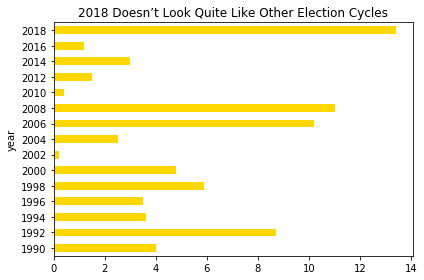

In [214]:
fig, ax = plt.subplots()

ax = df1.sort_values('year').plot(x='year', y='lead', kind = "barh", color = 'gold', legend=False, ax=ax, 
                                  title="2018 Doesn’t Look Quite Like Other Election Cycles")

# df1[df1.in_power == "no"].plot(x='year', y='lead', kind = "barh", color='grey', ax=ax)

plt.tight_layout()
plt.savefig("election.pdf",transparent = True)

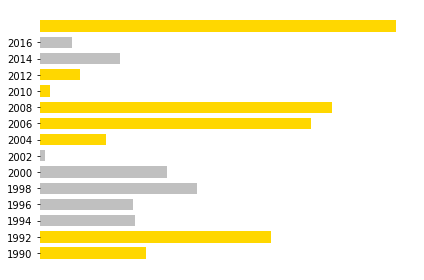

In [247]:
fig,ax = plt.subplots()

colors = {
  'yes': 'silver', 
  'no': 'gold'
}

color_list = [colors[category] for category in df1['in_power']]

ax.barh(df1['year'], df1['lead'], height=1.4, color=color_list)

ax.set_ylim(1988, 2020)
ax.axes.get_xaxis().set_visible(False)
ax.set_yticks([1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)



# note: I could not figure out how to add in y axis tick marks. I tried this:

# import matplotlib.ticker as ticker
# import numpy as np
# ax.yaxis.set_ticks(np.arrange(1990, 2018, 2))


plt.tight_layout()
plt.savefig("election2.pdf",transparent = True)

## Plot 2: Social Spending by Country

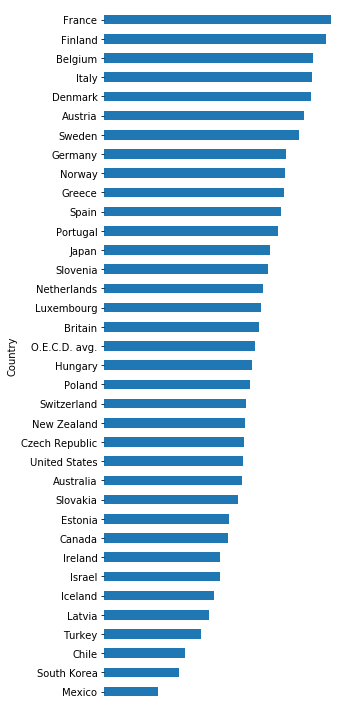

In [256]:
fig, ax = plt.subplots(figsize=(5,10))

df2.sort_values('Social Spending').plot(y='Social Spending', x='Country', kind = "barh", legend=False, ax=ax)

# ax = df2.sort_values('Social Spending').plot(x='Social Spending', y='Country', kind = "barh", legend=False)

ax.axes.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig("socialspending.pdf",transparent = True)

## Plot 3: Social Spending by Country

In [227]:
df3['pct_survived'] = 100 - df3['pct_defeated']

In [228]:
df3.head()

,cook_pvi,pct_defeated,pct_survived
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75


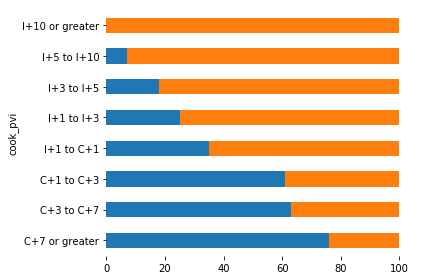

In [251]:
ax = df3.plot(kind='barh', x='cook_pvi', y=['pct_defeated', 'pct_survived'], stacked=True, legend=False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig("cooks_pvi.pdf",transparent = True)